<a href="https://colab.research.google.com/github/evanhatt/TravelingFood/blob/main/Analysis_FoodMarkWeins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#Begin by Installing and importing packages for analysis



In [ ]:
!pip install python-calamine
!pip install openpyxl

In [ ]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderUnavailable
import time
import os

#Now Let's Load and look at the Data

In [31]:


# Read the Excel file
FILEPATH = '/content/Markweinsfood2024.xlsx' # removed the absolute path, assuming the file is in the same directory as the script
# If the file is not in the same directory, provide the correct relative path. For example: 'data/Markweins_Food.xlsx'

# Check if the file exists
if not os.path.exists(FILEPATH):
    raise FileNotFoundError(f"File not found: {FILEPATH}")

df = pd.read_excel(FILEPATH, engine='openpyxl') # Changed the engine to openpyxl, calamime is used for .ods files

print("Original dataframe head:")
print(df.head())

# Function to get coordinates
def get_coordinates(country):
    if country == 'Other' or pd.isna(country):
        return np.nan, np.nan

    geolocator = Nominatim(user_agent="my_agent")
    try:
        location = geolocator.geocode(country, timeout=10)
        if location:
            return location.latitude, location.longitude
        else:
            return np.nan, np.nan
    except (GeocoderTimedOut, GeocoderUnavailable):
        return np.nan, np.nan

# Apply the function to get coordinates
df['country'] = df['country'].fillna('Other')
df[['latitude', 'longitude']] = df['country'].apply(lambda x: pd.Series(get_coordinates(x)))

print("\
Dataframe head after adding latitude and longitude:")
print(df.head())

# Save the updated dataframe
output_filepath = 'Markweins_Food_with_coordinates.xlsx'
df.to_excel(output_filepath, index=False)
print(f"\
Updated dataframe saved to {output_filepath}")

Original dataframe head:
   Unnamed: 0     video_id                                        video_title  \
0           0  8p_Ad9dCPVU  Island Seafood Paradise!! 🇲🇺 QUEEN OF SEAFOOD ...   
1           1  E3g-zgSmwUs  Street Food in Mauritius - FRIED CHICKEN TIKKA...   
2           2  rLfE_d538VM  Backyard Biryani Paradise!! EXTREME FOOD in Ma...   
3           3  nAF45YzUQ1w  Best STREET FOOD in Syria!! 🇸🇾 31 Syrian Meals...   
4           4  F2PTz6If3sY  Thai Street Food - BEST $5 MEALS in Phuket, Th...   

                   country upload_date  view_count  like_count  comment_count  \
0  Mauritius, East Africa   2024-10-01      114010        4046            172   
1  Port Louis, East Africa  2024-09-28      414661        8189            508   
2   Mauritius, East Africa  2024-09-24      686354       11125            578   
3          Damacus, Syria   2024-09-17      360046        6050            497   
4          Phuket,Thailand  2024-09-10      734831       11700            502   

 

# Mark Weins Data
##Now were are preparing the 'latitdue' and 'longitude' by dropping NaN values from videos that did not have any traveling content.  

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from datetime import datetime

# Load the updated Excel file
updated_filepath = '/content/Markweins_Food_with_coordinates.xlsx'
df_updated = pd.read_excel(updated_filepath, engine='openpyxl')

# Convert 'upload_date' to datetime
try:
    df_updated['upload_date'] = pd.to_datetime(df_updated['upload_date'], errors='coerce')
except Exception as e:
    print("Error converting upload_date to datetime:", e)

# Drop rows with NaN values in 'latitude' or 'longitude'
df_updated = df

In [ ]:
# Graphing countries and rendering a Scatter plot to look for patterns

In [33]:
import plotly.express as px

# Prepare the data for Plotly
# Ensure 'country' is a string type for consistent plotting
df_updated['country'] = df_updated['country'].astype(str)

# Create an interactive scatter plot with Plotly
fig = px.scatter_geo(
    df_updated,
    lat='latitude',
    lon='longitude',
    hover_name='country',
    color='country',
    symbol='country',  # Use different symbols for each country
    title='Interactive Geo Scatter Plot of Video Uploads by Country',
    projection='natural earth',
    size_max=10,
    opacity=0.7
)

# Update layout for better visualization
fig.update_layout(
    geo=dict(
        showland=True,
        landcolor='lightgrey',
    ),
    margin=dict(l=0, r=0, t=50, b=0)
)

# Save the interactive plot to an HTML file
html_filename = 'interactive_geo_scatter_plot_with_symbols.html'
fig.write_html(html_filename)

print(f"Interactive plot with symbols saved to {html_filename}")

Interactive plot with symbols saved to interactive_geo_scatter_plot_with_symbols.html


In [35]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a figure
fig = go.Figure()

# Add scatter points for each country
for country in df_updated['country'].unique():
    country_data = df_updated[df_updated['country'] == country]
    fig.add_trace(go.Scattergeo(
        lon=country_data['longitude'],
        lat=country_data['latitude'],
        text=country_data['country'],
        mode='markers+text',
        marker=dict(size=5),
        name=country
    ))

# Add lines for each month
# Extract month-year from 'upload_date'
df_updated['month_year'] = df_updated['upload_date'].dt.to_period('M')

for month_year in df_updated['month_year'].unique():
    month_data = df_updated[df_updated['month_year'] == month_year]
    fig.add_trace(go.Scattergeo(
        lon=month_data['longitude'],
        lat=month_data['latitude'],
        mode='lines',
        line=dict(width=2),
        name=str(month_year)
    ))

# Update layout with interactive legend
fig.update_layout(
    title='Travel Routes with Monthly Color Coding',
    geo=dict(
        showland=True,
        landcolor='lightgrey',
    ),
    legend_title_text='Countries and Months',
    legend=dict(
        title='Filter by Month-Year',
        itemsizing='constant',
        itemclick='toggleothers',
        itemdoubleclick='toggle'
    )
)

# Save the interactive plot to an HTML file
html_filename = 'interactive_geo_scatter_plot_with_routes_and_legend.html'
fig.write_html(html_filename)

print(f"Interactive plot with travel routes and legend saved to {html_filename}")

AttributeError: Can only use .dt accessor with datetimelike values

##We are not looking at finding the Top 10 Videos based on View count and comparing this Bargraph with another graph for the Top 10 Countries visited based on visits and Videos filmed

<ipython-input-36-a08e16d4b0be>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warnin

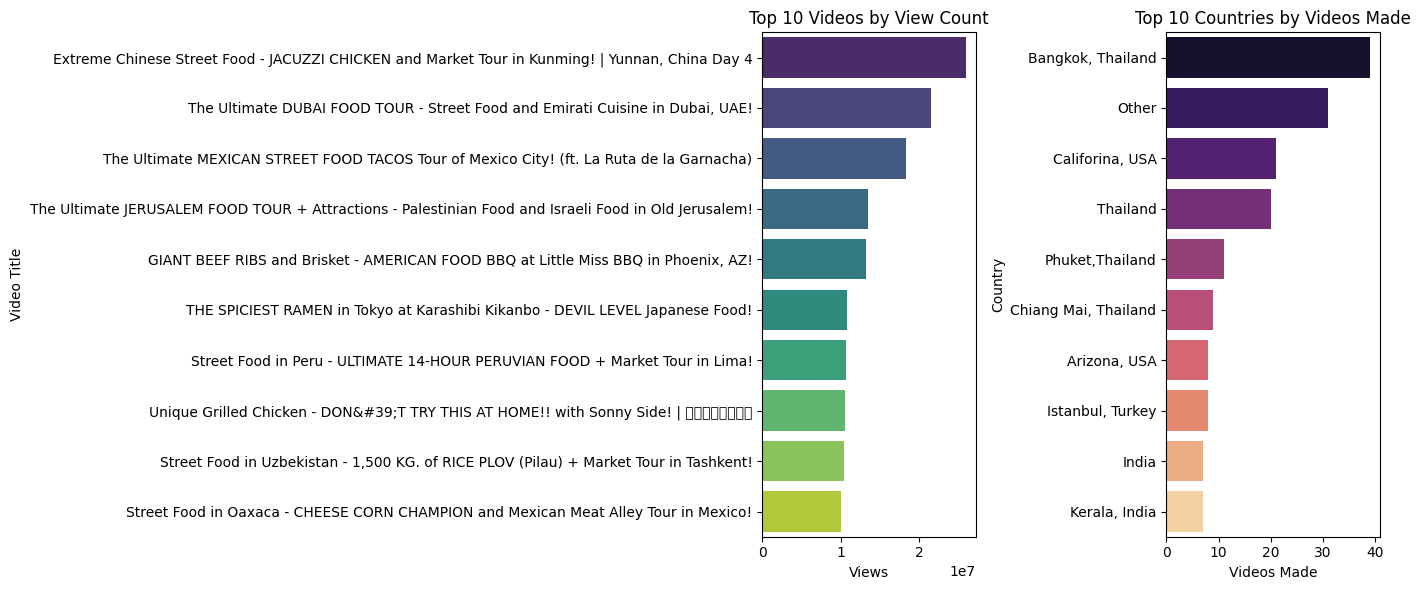

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'view_count' is numeric for sorting
df['view_count'] = pd.to_numeric(df['view_count'], errors='coerce')

# Top 10 videos with the most views
top_videos = df.nlargest(10, 'view_count')[['video_title', 'view_count']]

# Count visits per country
top_countries = df['country'].value_counts().nlargest(10)

# Plotting
plt.figure(figsize=(14, 6))

# Plot for top 10 videos
plt.subplot(1, 2, 1)
sns.barplot(y='video_title', x='view_count', data=top_videos, palette='viridis')
plt.title('Top 10 Videos by View Count')
plt.xlabel('Views')
plt.ylabel('Video Title')

# Plot for top 10 countries
plt.subplot(1, 2, 2)
sns.barplot(y=top_countries.index, x=top_countries.values, palette='magma')
plt.title('Top 10 Countries by Videos Made')
plt.xlabel('Videos Made')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

##Looking at a Heat Map to find any patterns in the number of countries visted or videos uploaded through 2014-2024

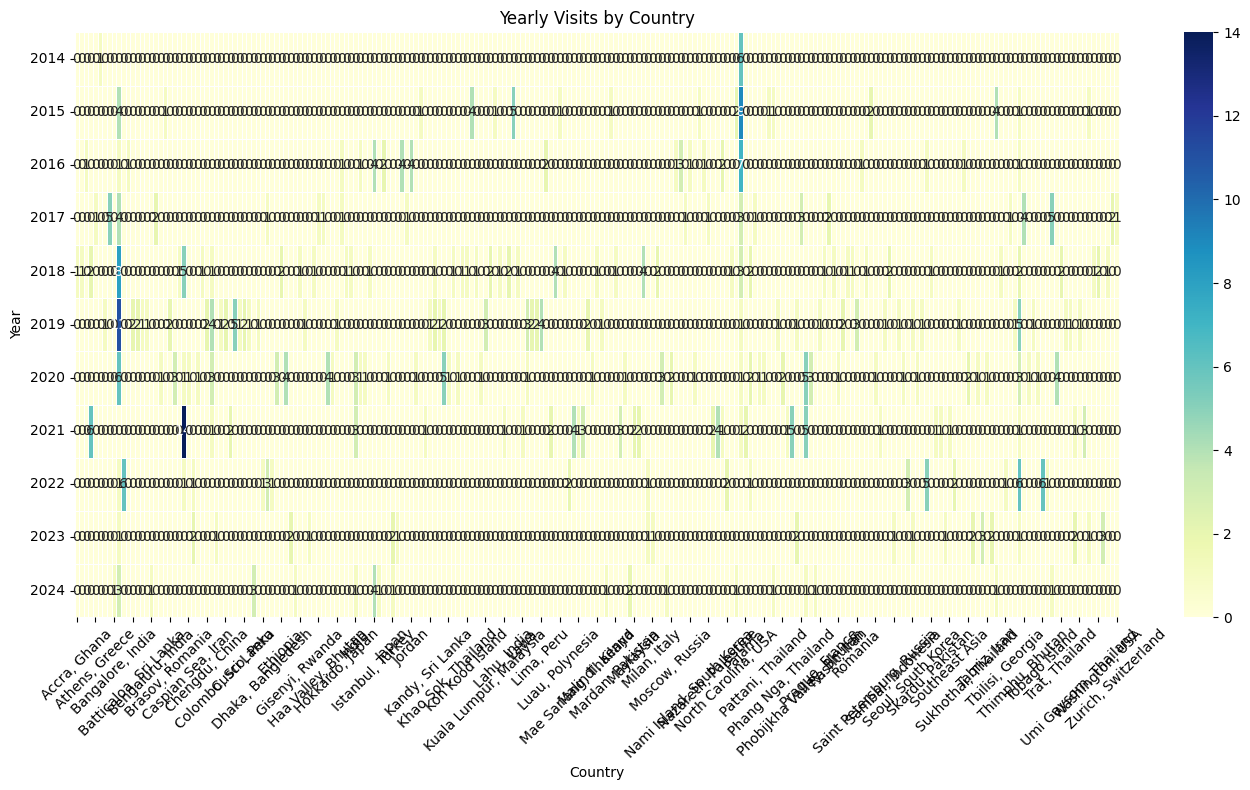

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract year from 'upload_date'
df['year'] = pd.to_datetime(df['upload_date']).dt.year

# Group by year and country to count visits
yearly_visits = df.groupby(['year', 'country']).size().reset_index(name='visit_count')

# Pivot the data for easier plotting
yearly_visits_pivot = yearly_visits.pivot(index='year', columns='country', values='visit_count').fillna(0)

# Plotting
plt.figure(figsize=(14, 8))
sns.heatmap(yearly_visits_pivot, cmap='YlGnBu', linewidths=0.5, annot=True, fmt='g')
plt.title('Yearly Visits by Country')
plt.xlabel('Country')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Trying another graph with the same data perameters

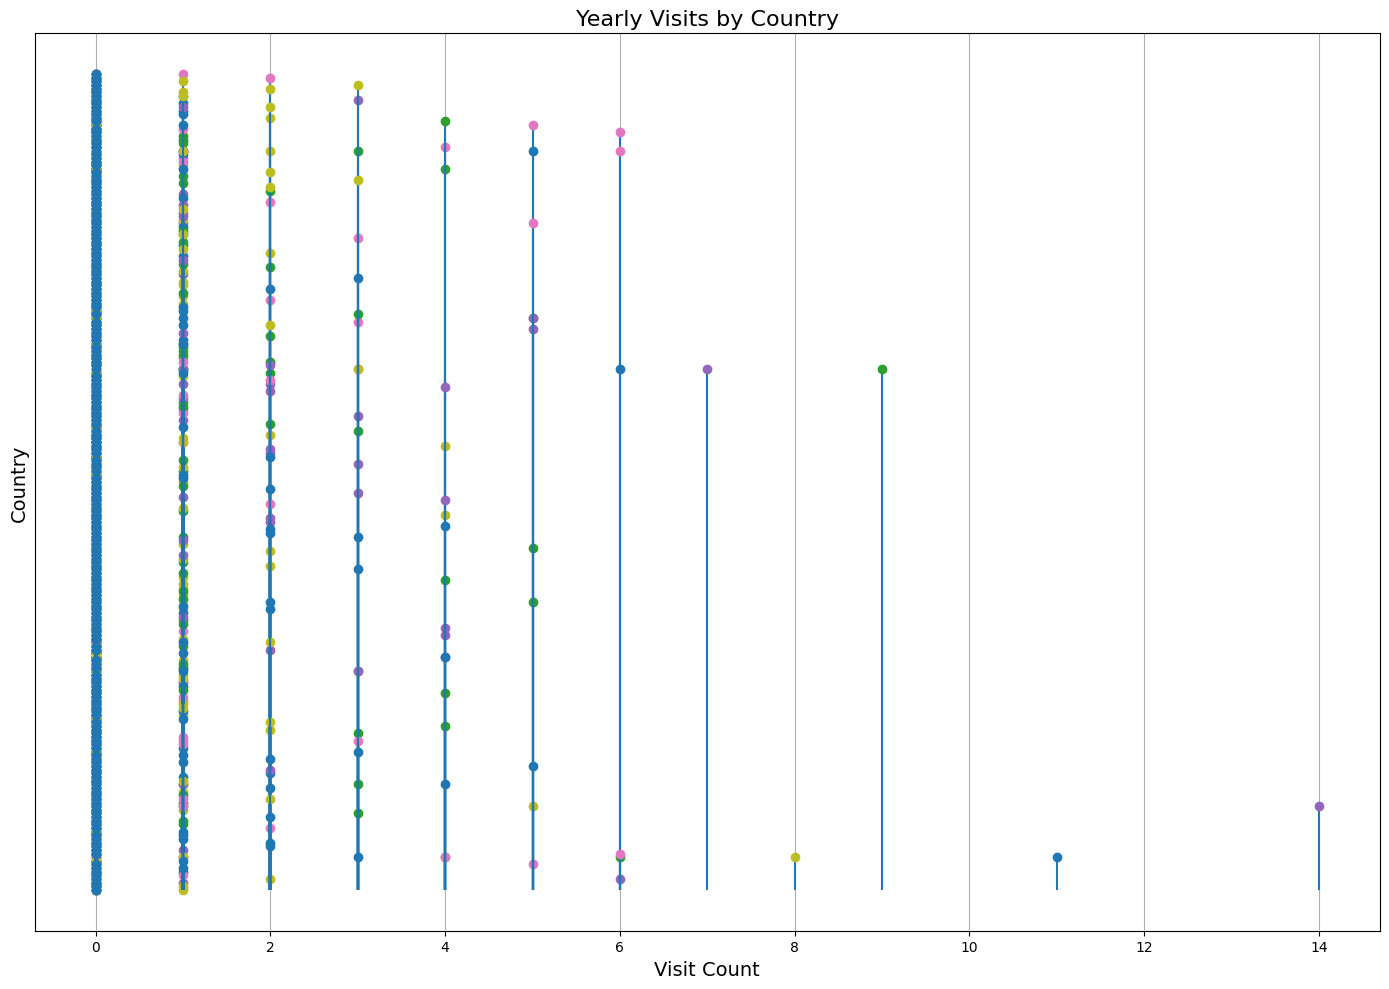

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already defined and has the 'upload_date' column
# Extract year from 'upload_date'
df['year'] = pd.to_datetime(df['upload_date']).dt.year

# Group by year and country to count visits
yearly_visits = df.groupby(['year', 'country']).size().reset_index(name='visit_count')

# Pivot the data for easier plotting
yearly_visits_pivot = yearly_visits.pivot(index='country', columns='year', values='visit_count').fillna(0)

# Set the figure size
plt.figure(figsize=(14, 10))

# Loop through each year and plot lollipop graphs for each country
for year in yearly_visits_pivot.columns:
    plt.stem(yearly_visits_pivot[year], yearly_visits_pivot.index, basefmt=" ", markerfmt='o', linefmt='-')

# Set labels and title
plt.title('Yearly Visits by Country', fontsize=16)
plt.xlabel('Visit Count', fontsize=14)
plt.ylabel('Country', fontsize=14)

# Hide the y-tick labels
plt.yticks([])

# Add grid lines for better visibility
plt.grid(axis='x')

plt.tight_layout()
plt.show()


#Now were will divided each year into a subgraph and look at each country visited and how many videos were uploaded for each country aka visits

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming df is already defined and has the 'upload_date' column
# Extract year from 'upload_date'
df['year'] = pd.to_datetime(df['upload_date']).dt.year

# Group by year and country to count visits
yearly_visits = df.groupby(['year', 'country']).size().reset_index(name='visit_count')

# Pivot the data for easier plotting
yearly_visits_pivot = yearly_visits.pivot(index='country', columns='year', values='visit_count').fillna(0)

# Set the number of years
years = yearly_visits_pivot.columns
num_years = len(years)

# Create a color mapping for each year
color_mapping = {
    2014: 'red',
    2015: 'blue',
    2016: 'yellow',
    2017: 'orange',
    2018: 'green',
    2019: 'purple',
    2020: 'pink',
    2021: 'brown',
    2022: 'lightblue',
    2023: 'gray',
    2024: 'black'
}

# Create subplots (horizontal arrangement)
fig = make_subplots(rows=1, cols=num_years, shared_yaxes=True, subplot_titles=[str(year) for year in years])

# Loop through each year and create a bar plot for each subplot
for i, year in enumerate(years):
    # Filter countries that were visited in the current year
    visited_countries = yearly_visits[yearly_visits['year'] == year]

    # Add bars to the figure for the specific subplot
    fig.add_trace(go.Bar(
        x=visited_countries['country'],
        y=visited_countries['visit_count'],
        name=str(year),
        hovertemplate='Country: %{x}<br>Visit Count: %{y}<extra></extra>',
        marker_color=color_mapping[year],  # Use color mapping for the specific year
    ), row=1, col=i + 1)

# Update layout
fig.update_layout(
    title='Yearly Visits by Country',
    xaxis_title='',
    yaxis_title='Country',
    height=500,  # Fixed height for all subplots
    showlegend=False  # Hides legend to avoid redundancy
)

# Update x-axis labels
for i in range(num_years):
    fig['layout']['xaxis' + str(i + 1)].update(title='')

# Show the figure
fig.show()


Looking at the Business side of things: Ploting a Lollipop bar graph to find out the top 5 videos based on ad revenue

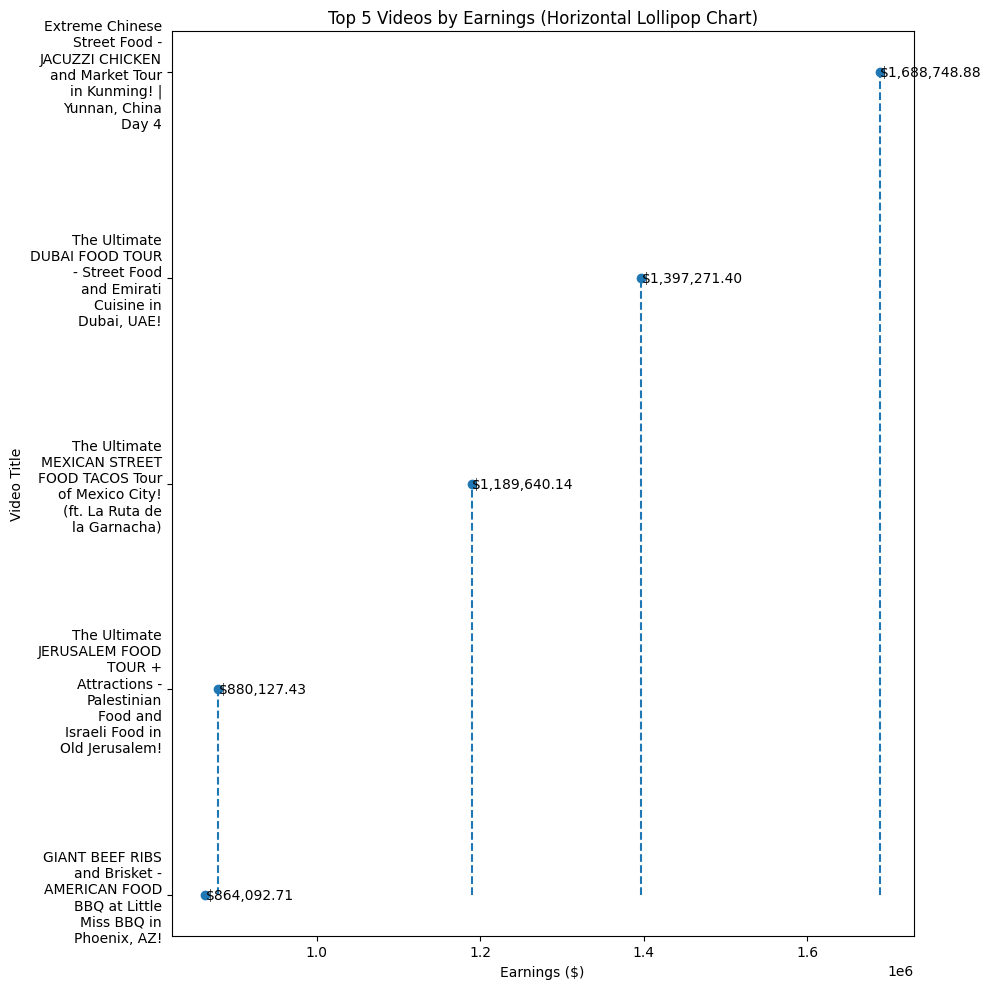

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Calculate earnings for each video
df['earnings'] = df['average_perview']

# Get the top 5 videos by earnings and sort them from highest to lowest
top_videos = df.nlargest(5, 'earnings')[['video_title', 'earnings']].sort_values(by='earnings', ascending=False)

# Wrap the video titles for better display
top_videos['video_title'] = top_videos['video_title'].apply(lambda x: "\n".join(textwrap.wrap(x, width=15)))

# Reverse the order of the DataFrame to have highest earnings at the top
top_videos = top_videos[::-1]

# Create the horizontal lollipop chart with increased figure height
plt.figure(figsize=(10, 10))

plt.stem(top_videos['earnings'], top_videos['video_title'], linefmt='--', markerfmt='o', basefmt=" ")

# Add labels and title
plt.xlabel('Earnings ($)')
plt.ylabel('Video Title')
plt.title('Top 5 Videos by Earnings (Horizontal Lollipop Chart)')

# Annotate each lollipop with the earnings amount
for index, value in enumerate(top_videos['earnings']):
    plt.text(value, index, f'${value:,.2f}', fontsize=10, ha='left', va='center')

# Adjust the layout to make room for wrapped titles
plt.tight_layout()

# Display the plot
plt.show()

#Now executing time series analysis forecasting using ARIMA.

In [4]:
import pandas as pd
import plotly.express as px
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
file_path = '/content/Markweinsfood2024.xlsx'
df = pd.read_excel(file_path)

# Extract year from the 'upload_date' column
df['year'] = pd.to_datetime(df['upload_date']).dt.year

# Group by year and country to count the number of visits per country each year
yearly_visits = df.groupby(['year', 'country']).size().reset_index(name='visit_count')

# Create a pivot table to get a time series format (rows: year, columns: country, values: visit_count)
time_series_data = yearly_visits.pivot(index='year', columns='country', values='visit_count').fillna(0)

# Use the country list from the pivot table
countries = time_series_data.columns.tolist()

# Create a dictionary to store the ARIMA models and forecasts for each country
forecasts = {}

# ARIMA model for each country
for country in countries:
    # Select the time series data for that country
    country_series = time_series_data[country]

    # Create a DatetimeIndex using dummy dates (January 1st of each year)
    years = country_series.index
    dates = pd.to_datetime([f'{year}-01-01' for year in years])
    country_series.index = pd.DatetimeIndex(dates)

    # Fit the ARIMA model (ARIMA(1, 1, 1) is used, but you can tune these parameters)
    model = ARIMA(country_series, order=(1, 1, 1))
    model_fit = model.fit()

    # Forecast the next year (2025)
    forecast = model_fit.forecast(steps=1)

    # Access the forecasted value using .iloc[0]
    forecasts[country] = forecast.iloc[0]

# Convert the forecasts to a sorted list (from most to least likely visit)
predicted_visits_2025 = pd.DataFrame.from_dict(forecasts, orient='index', columns=['predicted_visits'])
predicted_visits_2025 = predicted_visits_2025.sort_values(by='predicted_visits', ascending=False)

# Replace negative values with 0
predicted_visits_2025['predicted_visits'] = predicted_visits_2025['predicted_visits'].clip(lower=0)

# Merge the predictions with the original dataset to get latitude and longitude
merged_data = pd.merge(predicted_visits_2025, df[['country', 'latitude', 'longitude']].drop_duplicates(),
                       left_index=True, right_on='country')

# Remove rows with missing coordinates
merged_data = merged_data.dropna(subset=['latitude', 'longitude'])

# Plot the forecasted visits on a map using Plotly
fig = px.scatter_geo(merged_data,
                     lat='latitude',
                     lon='longitude',
                     hover_name='country',
                     size='predicted_visits',
                     projection="natural earth",
                     title="Predicted Countries for Mark Wiens to Visit in 2025",
                     size_max=30)

# Show the map
fig.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency informat

Filtering the data and executing it again for top 8 countries based on the highest probablity statistic.

In [9]:
import pandas as pd
import plotly.express as px
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
file_path = '/content/Markweinsfood2024.xlsx'
df = pd.read_excel(file_path)

# Extract year from the 'upload_date' column
df['year'] = pd.to_datetime(df['upload_date']).dt.year

# Group by year and country to count the number of visits per country each year
yearly_visits = df.groupby(['year', 'country']).size().reset_index(name='visit_count')

# Create a pivot table to get a time series format (rows: year, columns: country, values: visit_count)
time_series_data = yearly_visits.pivot(index='year', columns='country', values='visit_count').fillna(0)

# Use the country list from the pivot table
countries = time_series_data.columns.tolist()

# Create a dictionary to store the ARIMA models and forecasts for each country
forecasts = {}

# ARIMA model for each country
for country in countries:
    # Select the time series data for that country
    country_series = time_series_data[country]

    # Create a DatetimeIndex using dummy dates (January 1st of each year)
    years = country_series.index
    dates = pd.to_datetime([f'{year}-01-01' for year in years])
    country_series.index = pd.DatetimeIndex(dates)

    # Fit the ARIMA model (ARIMA(1, 1, 1) is used, but you can tune these parameters)
    model = ARIMA(country_series, order=(1, 1, 1))
    model_fit = model.fit()

    # Forecast the next year (2025)
    forecast = model_fit.forecast(steps=1)

    # Access the forecasted value using .iloc[0]
    forecasts[country] = forecast.iloc[0]

# Convert the forecasts to a sorted list (from most to least likely visit)
predicted_visits_2025 = pd.DataFrame.from_dict(forecasts, orient='index', columns=['predicted_visits'])
predicted_visits_2025 = predicted_visits_2025.sort_values(by='predicted_visits', ascending=False)

# Replace negative values with 0
predicted_visits_2025['predicted_visits'] = predicted_visits_2025['predicted_visits'].clip(lower=0)

# Select the top 8 countries with the highest predicted visits
top_countries = predicted_visits_2025.head(8)

# Convert these top countries to a list
top_country_list = top_countries.index.tolist()

# Print or use the list of most likely countries to be visited in 2025
print("Top 8 predicted countries for 2025:", top_country_list)

# Merge the predictions with the original dataset to get latitude and longitude for top 8 countries
merged_data = pd.merge(top_countries, df[['country', 'latitude', 'longitude']].drop_duplicates(),
                       left_index=True, right_on='country')

# Remove rows with missing coordinates
merged_data = merged_data.dropna(subset=['latitude', 'longitude'])

# Plot the forecasted visits on a map using Plotly (show only top 8 countries)
fig = px.scatter_geo(merged_data,
                     lat='latitude',
                     lon='longitude',
                     hover_name='country',
                     size='predicted_visits',
                     projection="natural earth",
                     title="Top 8 Predicted Countries for Mark Wiens to Visit in 2025",
                     size_max=30)

# Show the map
fig.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency informat

Top 8 predicted countries for 2025: ['Bangkok, Thailand', 'Damacus, Syria ', 'Califorina, USA', 'USA', 'Thailand', 'Yanagawa, Japan', 'Sydney, Australia ', 'Japan']


In [8]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from IPython.display import display

# Load the dataset
file_path = '/content/Markweinsfood2024.xlsx'
df = pd.read_excel(file_path)

# Extract year from the 'upload_date' column
df['year'] = pd.to_datetime(df['upload_date']).dt.year

# Group by year and country to count the number of visits per country each year
yearly_visits = df.groupby(['year', 'country']).size().reset_index(name='visit_count')

# Create a pivot table to get a time series format (rows: year, columns: country, values: visit_count)
time_series_data = yearly_visits.pivot(index='year', columns='country', values='visit_count').fillna(0)

# Use the country list from the pivot table
countries = time_series_data.columns.tolist()

# Create a dictionary to store the ARIMA models and forecasts for each country
forecasts = {}

# ARIMA model for each country
for country in countries:
    # Select the time series data for that country
    country_series = time_series_data[country]

    # Create a DatetimeIndex using dummy dates (January 1st of each year)
    years = country_series.index
    dates = pd.to_datetime([f'{year}-01-01' for year in years])
    country_series.index = pd.DatetimeIndex(dates)

    # Fit the ARIMA model (ARIMA(1, 1, 1) is used, but you can tune these parameters)
    model = ARIMA(country_series, order=(1, 1, 1))
    model_fit = model.fit()

    # Forecast the next year (2025)
    forecast = model_fit.forecast(steps=1)

    # Access the forecasted value using .iloc[0]
    forecasts[country] = forecast.iloc[0]

# Convert the forecasts to a DataFrame
predicted_visits_2025 = pd.DataFrame.from_dict(forecasts, orient='index', columns=['predicted_visits'])

# Replace negative values with 0
predicted_visits_2025['predicted_visits'] = predicted_visits_2025['predicted_visits'].clip(lower=0)

# Merge the predictions with the original dataset to get latitude and longitude for all countries
merged_data = pd.merge(predicted_visits_2025, df[['country', 'latitude', 'longitude']].drop_duplicates(),
                       left_index=True, right_on='country')

# Remove rows with missing coordinates
merged_data = merged_data.dropna(subset=['latitude', 'longitude'])

# Display the table with predicted statistics for all countries
display(merged_data[['country', 'predicted_visits', 'latitude', 'longitude']])


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency informat

KeyboardInterrupt: 

In [58]:
!pip install pandas geopandas matplotlib

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load the world map data directly from the URL
world = gpd.read_file("https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip")

# Extract year from 'upload_date'
df['year'] = pd.to_datetime(df['upload_date']).dt.year

# Group by year and country to get the list of countries visited each year
grouped = df.groupby(['year', 'country']).size().reset_index(name='count')

# Set up a figure for plotting
num_years = grouped['year'].nunique()
fig, axes = plt.subplots(nrows=1, ncols=num_years, figsize=(5 * num_years, 5), sharey=True)

# Create a map for each year
for ax, (year, data) in zip(axes, grouped.groupby('year')):
    # Merge country data with the world map
    merged = world.set_index('NAME').join(data.set_index('country'))

    # Plot the map
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    merged.plot(column='count', ax=ax, legend=True, cax=cax, missing_kwds={'color': 'lightgrey'})

    # Add country names to the map (optional)
    #for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged.index):
    #   ax.text(x, y, label, fontsize=8, ha='center')

    # Title for each subplot
    ax.set_title(f'Countries Visited in {year}')
    ax.set_axis_off()

plt.tight_layout()
plt.show()

HTTPError: HTTP Error 406: Not Acceptable

# New future data comparisons with Bandana Guy Data

In [24]:


# Read the Excel file
FILEPATH = '/content/ytfoodbandana2024.xlsx' # removed the absolute path, assuming the file is in the same directory as the script
# If the file is not in the same directory, provide the correct relative path. For example: 'data/Markweins_Food.xlsx'

# Check if the file exists
if not os.path.exists(FILEPATH):
    raise FileNotFoundError(f"File not found: {FILEPATH}")

df2 = pd.read_excel(FILEPATH, engine='openpyxl') # Changed the engine to openpyxl, calamime is used for .ods files

print("Original dataframe head:")
print(df2.head())

# Function to get coordinates
def get_coordinates(country):
    if country == 'Other' or pd.isna(country):
        return np.nan, np.nan

    geolocator = Nominatim(user_agent="my_agent")
    try:
        location = geolocator.geocode(country, timeout=10)
        if location:
            return location.latitude, location.longitude
        else:
            return np.nan, np.nan
    except (GeocoderTimedOut, GeocoderUnavailable):
        return np.nan, np.nan

# Apply the function to get coordinates
df2['country'] = df2['country'].fillna('Other')
df2[['latitude', 'longitude']] = df2['country'].apply(lambda x: pd.Series(get_coordinates(x)))

print("\
Dataframe head after adding latitude and longitude:")
print(df2.head())

# Save the updated dataframe
output_filepath = 'Markweins_Food_with_coordinates.xlsx'
df2.to_excel(output_filepath, index=False)
print(f"\
Updated dataframe saved to {output_filepath}")

Original dataframe head:
   Unnamed: 0     video_id                                        video_title  \
0         0.0  WQXmBU3Pv-0  Traveling To The World&#39;s WORST Food Country!!   
1         1.0  mgAv3NSgyYs     Surviving Ghana!! Africa’s Most EXTREME Food!!   
2         2.0  Gt8U7ekFCC0  Eating in Africa&#39;s WILDEST Fish Market!! S...   
3         3.0  hi9fIuoUki4  How Eating Snails Could Save Africa&#39;s Bush...   
4         4.0  NqGJaobxyWk  Inside Africa’s Billion Dollar Bushmeat Indust...   

  country upload_date  view_count  like_count  comment_count longitude  \
0   Ghana  2024-09-27   1098963.0     22933.0         2178.0   -1.0232   
1   Ghana  2024-09-20    973424.0     11551.0          732.0   -1.0232   
2   Ghana  2024-09-13   2326715.0     32898.0         2208.0   -1.0232   
3   Ghana  2024-09-06    704453.0     17505.0         1158.0   -1.0232   
4   Ghana  2024-08-30   1126531.0     23553.0         2051.0   -1.0232   

  latitude  revenue_lowviews  revenue_highk

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from datetime import datetime

# Load the updated Excel file
updated_filepath = '/content/ytfoodbandana2024.xlsx'
df2_updated = pd.read_excel(updated_filepath, engine='openpyxl')

# Convert 'upload_date' to datetime
try:
    df2_updated['upload_date'] = pd.to_datetime(df2_updated['upload_date'], errors='coerce')
except Exception as e:
    print("Error converting upload_date to datetime:", e)

# Drop rows with NaN values in 'latitude' or 'longitude'
df2_updated = df2

In [26]:
import plotly.express as px

# Prepare the data for Plotly
# Ensure 'country' is a string type for consistent plotting
df2_updated['country'] = df2_updated['country'].astype(str)

# Create an interactive scatter plot with Plotly
fig = px.scatter_geo(
    df2_updated,
    lat='latitude',
    lon='longitude',
    hover_name='country',
    color='country',
    symbol='country',  # Use different symbols for each country
    title='Interactive Geo Scatter Plot of Video Uploads by Country',
    projection='natural earth',
    size_max=10,
    opacity=0.7
)

# Update layout for better visualization
fig.update_layout(
    geo=dict(
        showland=True,
        landcolor='lightgrey',
    ),
    margin=dict(l=0, r=0, t=50, b=0)
)

# Save the interactive plot to an HTML file
html_filename = 'interactive_geo_scatter_plot_with_symbols.html'
fig.write_html(html_filename)

print(f"Interactive plot with symbols saved to {html_filename}")

Interactive plot with symbols saved to interactive_geo_scatter_plot_with_symbols.html


<ipython-input-27-1f9bc8f0b42f>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warnin

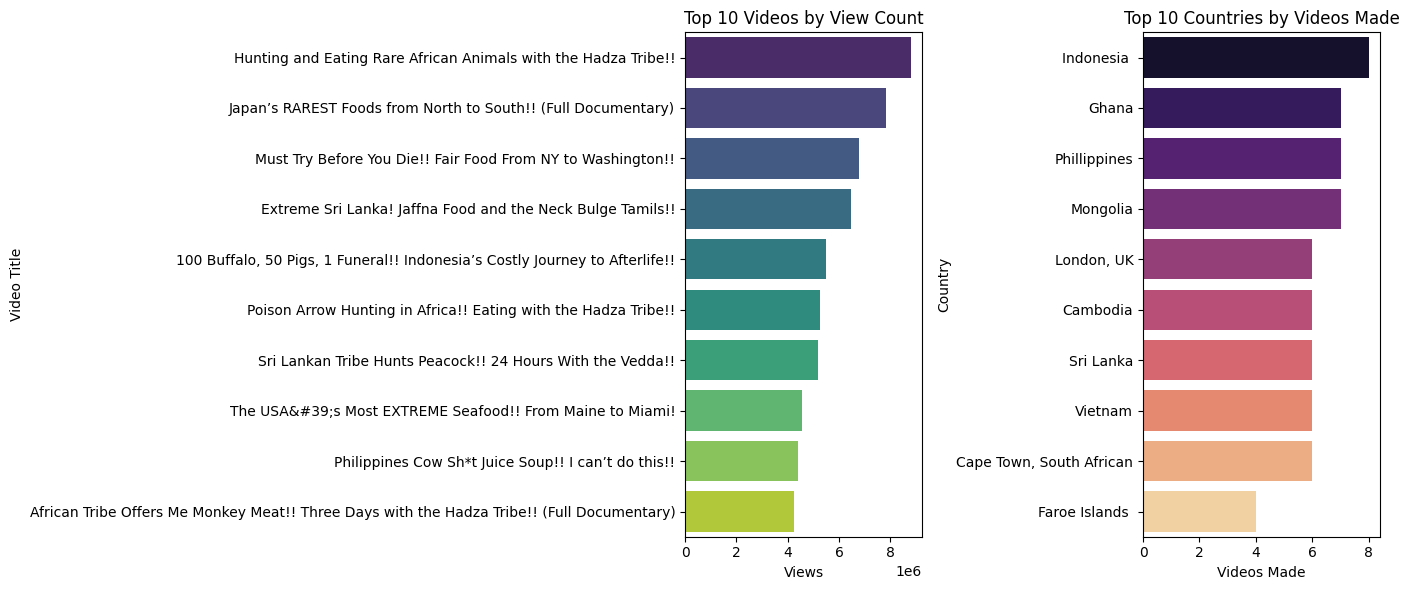

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'view_count' is numeric for sorting
df2['view_count'] = pd.to_numeric(df2['view_count'], errors='coerce')

# Top 10 videos with the most views
top_videos = df2.nlargest(10, 'view_count')[['video_title', 'view_count']]

# Count visits per country
top_countries = df2['country'].value_counts().nlargest(10)

# Plotting
plt.figure(figsize=(14, 6))

# Plot for top 10 videos
plt.subplot(1, 2, 1)
sns.barplot(y='video_title', x='view_count', data=top_videos, palette='viridis')
plt.title('Top 10 Videos by View Count')
plt.xlabel('Views')
plt.ylabel('Video Title')

# Plot for top 10 countries
plt.subplot(1, 2, 2)
sns.barplot(y=top_countries.index, x=top_countries.values, palette='magma')
plt.title('Top 10 Countries by Videos Made')
plt.xlabel('Videos Made')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

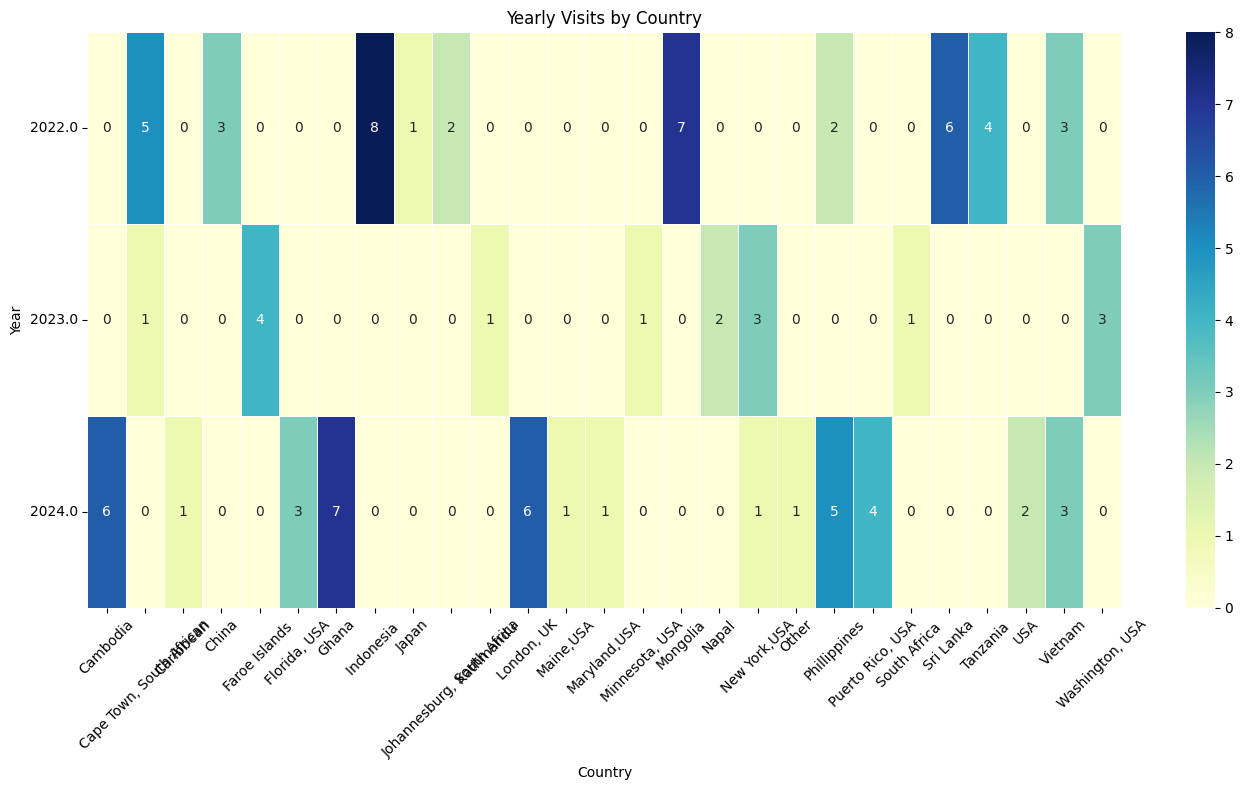

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract year from 'upload_date'
df2['year'] = pd.to_datetime(df2['upload_date']).dt.year

# Group by year and country to count visits
yearly_visits = df2.groupby(['year', 'country']).size().reset_index(name='visit_count')

# Pivot the data for easier plotting
yearly_visits_pivot = yearly_visits.pivot(index='year', columns='country', values='visit_count').fillna(0)

# Plotting
plt.figure(figsize=(14, 8))
sns.heatmap(yearly_visits_pivot, cmap='YlGnBu', linewidths=0.5, annot=True, fmt='g')
plt.title('Yearly Visits by Country')
plt.xlabel('Country')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already defined and has the 'upload_date' column
# Extract year from 'upload_date'
df2['year'] = pd.to_datetime(df2['upload_date']).dt.year

# Group by year and country to count visits
yearly_visits = df.groupby(['year', 'country']).size().reset_index(name='visit_count')

# Pivot the data for easier plotting
yearly_visits_pivot = yearly_visits.pivot(index='country', columns='year', values='visit_count').fillna(0)

# Set the figure size
plt.figure(figsize=(14, 10))

# Loop through each year and plot lollipop graphs for each country
for year in yearly_visits_pivot.columns:
    plt.stem(yearly_visits_pivot[year], yearly_visits_pivot.index, basefmt=" ", markerfmt='o', linefmt='-')

# Set labels and title
plt.title('Yearly Visits by Country', fontsize=16)
plt.xlabel('Visit Count', fontsize=14)
plt.ylabel('Country', fontsize=14)

# Hide the y-tick labels
plt.yticks([])

# Add grid lines for better visibility
plt.grid(axis='x')

plt.tight_layout()
plt.show()


KeyError: 'year'

In [30]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming df is already defined
# Extract year from 'upload_date'
df2['year'] = pd.to_datetime(df2['upload_date']).dt.year

# Group by year and country to count visits
yearly_visits = df2.groupby(['year', 'country']).size().reset_index(name='visit_count')

# Pivot the data for easier plotting
yearly_visits_pivot = yearly_visits.pivot(index='country', columns='year', values='visit_count').fillna(0)

# Set the number of years
years = yearly_visits_pivot.columns
num_years = len(years)

# Create a color mapping for each year
color_mapping = {
    2021: 'brown',
    2022: 'blue',
    2023: 'green',
    2024: 'red'
}

# Create subplots (horizontal arrangement)
fig = make_subplots(rows=1, cols=num_years, shared_yaxes=True, subplot_titles=[str(year) for year in years])

# Loop through each year and create a bar plot for each subplot
for i, year in enumerate(years):
    # Filter countries that were visited in the current year
    visited_countries = yearly_visits[yearly_visits['year'] == year]

    # Add bars to the figure for the specific subplot
    fig.add_trace(go.Bar(
        x=visited_countries['country'],
        y=visited_countries['visit_count'],
        name=str(year),
        hovertemplate='Country: %{x}<br>Visit Count: %{y}<extra></extra>',
        marker_color=color_mapping[year],  # Use color mapping for the specific year
    ), row=1, col=i + 1)

# Update layout
fig.update_layout(
    title='Yearly Visits by Country',
    xaxis_title='',
    yaxis_title='Country',
    height=500,  # Fixed height for all subplots
    showlegend=False  # Hides legend to avoid redundancy
)

# Update x-axis labels
for i in range(num_years):
    fig['layout']['xaxis' + str(i + 1)].update(title='')

# Show the figure
fig.show()


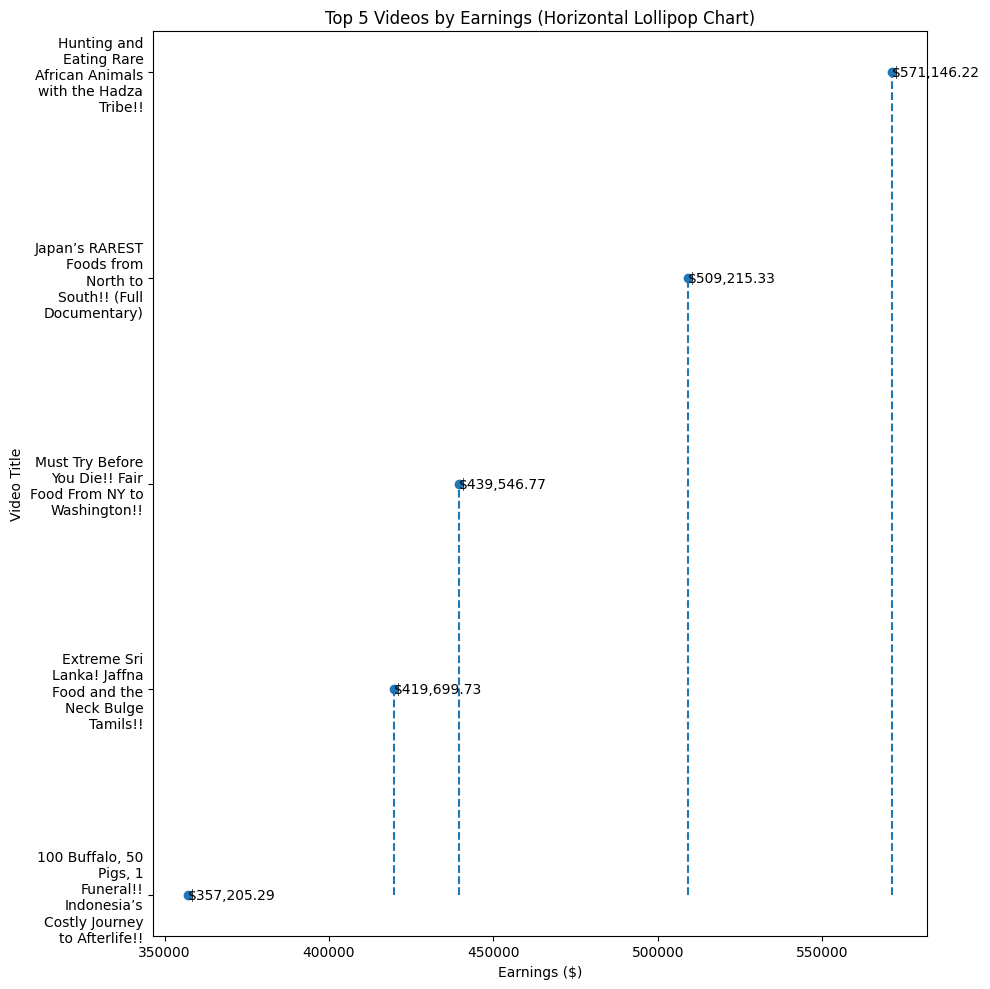

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Calculate earnings for each video
df2['earnings'] = df2['average_perview']

# Get the top 5 videos by earnings and sort them from highest to lowest
top_videos = df2.nlargest(5, 'earnings')[['video_title', 'earnings']].sort_values(by='earnings', ascending=False)

# Wrap the video titles for better display
top_videos['video_title'] = top_videos['video_title'].apply(lambda x: "\n".join(textwrap.wrap(x, width=15)))

# Reverse the order of the DataFrame to have highest earnings at the top
top_videos = top_videos[::-1]

# Create the horizontal lollipop chart with increased figure height
plt.figure(figsize=(10, 10))

plt.stem(top_videos['earnings'], top_videos['video_title'], linefmt='--', markerfmt='o', basefmt=" ")

# Add labels and title
plt.xlabel('Earnings ($)')
plt.ylabel('Video Title')
plt.title('Top 5 Videos by Earnings (Horizontal Lollipop Chart)')

# Annotate each lollipop with the earnings amount
for index, value in enumerate(top_videos['earnings']):
    plt.text(value, index, f'${value:,.2f}', fontsize=10, ha='left', va='center')

# Adjust the layout to make room for wrapped titles
plt.tight_layout()

# Display the plot
plt.show()